# Задача 1.Метод неопределенных коэффициентов для уравнений переноса

![task1](task1.png)

Запишем значения с коэффициентами и разложим в Тейлора, учтем достаточно много дифф.следствий. Сразу же занулим $f(t,x)$

![](1.png)

Сделаем коэффициенты такими, чтобы последние два слагаемых превратились в исходный диффур и сократились

![](2.png)

Уже имеем три ограничения на коэффициенты и остается последнее. Есть возможность сократить предпоследние два слагаемых

![](4.png)

Решим уравнение относительно коэффициентов, подставим их обратно, разложим заново и посмотрим на получившуюся асимптотику :

![task1_error](task1_error_1.jpg)

![task1_error](task1_error_2.jpg)

$O(dt^2,dxdt,dx^2)$

# Задача 2. XII.7.20

![second_task](second.png)

## 2.0 Порядок аппроксимации

# $$u_t+au_x=f(t,u)$$

Берем мэпл, раскладываем в тейлор по dt,dx до третьего порядка

![task2_order_1](task2_order_1.png)

Первые три слагаемых очевидно сокращаются подставлением исходного уравнения

1. $u_{tt}''=f_t'-Zu_{tx}''$ - убивает слагаемое с $dt$

2. $u_{tx}''=f_x'-Zu_{xx}''$ - убивает слагаемое с $dx$

3. Слагаемое у $dt^2$ : возьмем вторую производную по времени от обоих частей уравнения :

$f_{tt}''=u_{ttt}'''+Zu_{ttx}'''$ - видно что если подставить, то сократить все слагаемые в скобки не получится.

4. Слагаемое у dtdx : возьмем исходное уравнение и возьмем производные по t и по x от обоих частей уравнения :

$u_{ttx}'''=-Zu_{xxt}'''+f_{xt}''$ - убивает слагаемое с dt,dx

5. Аналогично пункту 3 показывается что слагамое с $dx^2$ тоже не сокращается

Итого $O(dx^2,dt^2)$

## 2.1 Дифф задача

Первая дробь - усредненная производная по времени : $\frac{u(t+dt/2,x+dx)}{2\tau}+\frac{u(t+dt/2,x)}{2\tau}$

Вторая дробь - аналогичным образом усредненная производная по пространству. Получаем уравнение вида

# $$u_t+au_x=f(t,u)$$

Т.е. приближаемая дифференциальная задача это уравнение переноса с правой частью

## 2.2 Исследование на устойчивость

Исследуем при помощи метода Неймана, подставив $y^n_k=\lambda ^ne^{i\alpha k}$ в однородное уравнение :

![second_task_solution](second_solution.jpg)

# Задача 3.XII.7.28e

![third_taskp1](third_part1.png)

![third_taskp1](third_part2.png)

_наверное в формулировке не хватает еще гран. условий в духе $u^n_0=0,\;\;u^n_{N-1}=0$_

## 3.1 Аппроксимация

Проверим аппроксимацию в промежуточных узлах : разложим в тейлора и учтем дифф. следствия

![task3_approx](task3_maple.png)

Невязка стремится к нулю по обоим переменным

Т.к. граничные условия даны как значения функции то при исследовании на аппроксимацию они будут вести себя как значения функции и следовательно для них верны выкладки как и для промежуточных узлов

Аппроксимацию показали

## 3.2 Устойчивость

Исследуем при помощи метода Неймана, подставив $y^n_k=\lambda ^ne^{i\alpha k}$ в однородное уравнение

Заметим что когда мы делаем уравнение однородным, то получаем стандартное уравнение, исследованое на семинаре, значит исследование на устойчивость можно провести аналогично семинару

На семинаре получили $\sigma \leq \frac{1}{2}$

## 3.3 Сходимость

При $\sigma \leq \frac{1}{2}$ есть аппроксимация и устойчивость, значит по теореме __Филлипова-Лакса__ метод сходится

# Задача 4. XIII.10.4ж

![task4_1](task4_part1.png)

![task4_2](task4_part2.png)

![task4_3](task4_part3.png)

### 4.0 Начальные условия

In [16]:
import numpy as np
def stolb1(x,L):
    answer=np.zeros(len(x))
    for i in range(len(x)):
        if x[i]>=L/2:
            answer[i]=2
    return answer

def stolb2(x,L):
    answer=np.zeros(len(x))
    for i in range(len(x)):
        if x[i]<=2*L/3:
            if x[i]>=L/3:
                answer[i]=2    
    return answer

### 4.1 Шаг по времени

### $$Y_1=x_n+\Delta t a_{11}f(T_1,Y_1)\\
Y_2=x_n+\Delta t(a_{12}f(T_1,Y_1)+a_{22}f(T_2,T_2))$$

Запишем функцию в матричном виде

![matrix](task4_matrix.jpg)

Запишем первое уравнение :

$y=x_n+\Delta t a_{11}(Ay+b)$

$y-\Delta t a_{11}Ay=x_n+\Delta t a_{11}b$

$(E-\Delta t a_{11} A)y=x_n+\Delta t a_{11}b$

$y=(E-\Delta t a_{11}A)^{-1}(x_n+\Delta t a_{11}b)$

Учитывая что в нашем конкретном случае т.к. на краях нули, вектор b целиком состоит из нулей и формулу можно упростить

$y=(E-\Delta t a_{11}A)^{-1}x_n$

Таким образом поиск $Y_1$ требует обращения матрицы $E-\Delta t a_{11} A$

Напишем решение

In [17]:
#Пример как добыть матрицу нужного вида
from scipy.sparse import diags
import numpy as np
import math
def get_A(n):
    k = [np.ones(n-1),-2*np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    A = diags(k,offset).toarray()
    return A

In [18]:
get_A(4)

array([[-2.,  1.,  0.,  0.],
       [ 1., -2.,  1.,  0.],
       [ 0.,  1., -2.,  1.],
       [ 0.,  0.,  1., -2.]])

In [19]:
#На краях условие у нас в задаче всегда ноль поэтому вектор b реализовывать не буду
def get_Y1(state, dt,a11=(3-math.sqrt(3))/6):
    nx=len(state)
    A=get_A(nx)
    E=np.eye(nx)#единичная матрица
    MainMatrix=E-dt*a11*A
    inverse=np.linalg.inv(MainMatrix)
    state=np.dot(inverse,state)
    return state

Теперь нужно аналогично расписать второе уравнение :

$y=x_n+\Delta t a_{21} (AY_1+b)+\Delta t a_{22} (Ay+b)$

$y=x_n+\Delta t a_{21} AY_1+\Delta t a_{22}Ay$

$y=(E-\Delta t a_{22}A)^{-1}(x_n+\Delta t a_{21}AY_1)$

In [20]:
#Предполагается что мы заранее вычислили Y1 и можем поставить его в функцию
def get_Y2(state, dt,Y1,a21=math.sqrt(3)/3,a22=(3-math.sqrt(3))/6):
    nx=len(state)
    A=get_A(nx)
    E=np.eye(nx)#единичная матрица
    MainMatrix=E-dt*a22*A
    inverse=np.linalg.inv(MainMatrix)
    second=state+dt*a21*np.dot(A,Y1)
    
    state=np.dot(inverse,second)
    return state

Теперь можно по красоте оформлять функцию

In [21]:
import numpy as np
from scipy.optimize import fsolve
import math
def rk2_implicit(state, func, dt):
    
    Y1=get_Y1(state,dt)
    Y2=get_Y2(state,dt,Y1)
    story=[Y1,Y2]
    
    A=get_A(len(state))
    
    return state+dt*(1/2*func(Y1)+1/2*func(Y2))

RK4

In [22]:
def rk4(state, func, dt):
    Y=[0,0,0,0]
    Y[0]=state
    Y[1]=state+dt/2*func(Y[0])
    Y[2]=state+dt/2*func(Y[1])
    Y[3]=state+dt*func(Y[2])
    return state+dt/6*(func(Y[0])+2*func(Y[1])+2*func(Y[2])+func(Y[3]))

### 4.2 Шаг по пространству

Для шага по пространству будем приближать вторую производную следующим образом :

### $$\frac{\partial^2u}{\partial x^2} \approx \frac{u(x+\Delta x)-2u(x)+u(x-\Delta x)}{\Delta x ^2}$$

Реализуем соответствующую функцию :

In [23]:
def central_diff_second_der(f,dx,a=0,b=0): #Принимает значение функции в узлах (без крайних),шаг и краевые условия
    diff_f=np.zeros(len(f))
    diff_f[0]=(f[1]-2*f[0]+a)/(dx*dx)
    
    for i in range(1,f.size-1):
        diff_f[i]=(f[i+1]-2*f[i]+f[i-1])/(dx*dx)
        
    diff_f[-1]=(b-2*f[-1]+f[-2])/(dx*dx)
    return diff_f

### 4.3 Точное решение

Точное решение выражается рядом 

$$u(x,t)=\sum\limits_{n=1}^{\infty}\alpha_n \exp(-\frac{\pi^2 n^2 kt}{a^2})\sin \frac{\pi n x}{a}$$

С коэффициентами, вычисляемыми по формуле

$$\alpha_n=\frac{2}{a}\int\limits_{0}^a \phi(x)\sin \frac{\pi n x}{a}dx$$

В задаче предлагается рассмотреть случай когда $\phi(x)$ - ступенька высотой 2 с середины отрезка и до конца и случай, когда $\phi(x)$ - ступенька высотой 2, занимающая вторую треть отрезка

Посчитаем эти интегралы руками руками : 

![task4_integral1](task4_integral1.png)

![task4_integral2](task4_integral2.png)

In [24]:
import numpy as np
N=1000 # Число слагаемых ряда
a1=np.zeros(N)
a2=np.zeros(N)
a1[0]=0
a2[0]=0
for n in range(1,N):
    a1[n]=4*(np.cos(np.pi*n/2)-np.cos(np.pi*n))/np.pi/n
    a2[n]=4*(np.cos(np.pi*n/3)-np.cos(2*np.pi*n/3))/np.pi/n

In [25]:
def compute_x(t,L,x,coef=a1,KO=1):
    N=len(coef)
#    xes=np.linspace(0,L,nx+1)
    summ=np.zeros(len(x))
    for n in range(1,N):
        summ+=coef[n]*np.exp(-np.pi**2*n**2*KO*t/L/L)*np.sin(np.pi*n*x/L)
    return summ

In [26]:
def solveDiffusion(u0,coefficients, timeMethod, spaceMethod, nx = 100, nt = 200, L = 1.0, T = 1.0, KO = 1.0,):
    """
    Входные аргументы:
    u0 -- функция для вычисления начального значения u(t=0,x)
    timeMethod -- функция, метод интегрирования по времени
    spaceMethod -- функция, метод аппроксимации du/dx
    nx -- индекс последнего узла сетки x_i по пространству. i = 0 ... nx,.
    nt -- индекс последнего узла сетки t_i по времени. i = 0 ... nt, t_nt = T
    L -- длина отрезка по пространству
    T -- до какого момента времени производить интегрирование
    K0 -- коэффициент теплопроводности
    """
    
    # параметры пространственной сетки
    dx = L / nx
 #   x = np.arange(0, nx + 1) * dx
    x = np.linspace(dx,L-dx,nx-1) # В краевых узлах не считаем
    # параметры временной сетки
    dt = T / nt
    t = np.arange(0, nt + 1) * dt
    # число Куранта
    CFL = KO * dt / dx**2
    print("Число Куранта CFL {}".format(CFL))
    
    # инициализируем массивы для хранения численного и точного решения во все моменты времени
    u = np.zeros((nt+1, nx-1))
    uExact = np.zeros((nt+1, nx-1))
    # задаем решение в начальный момент времени
    u[0,:] = u0(x,L)
    uExact[0,:] = u0(x,L)
    
    # цикл по времени
    for k in range(nt):
        u[k+1,:] = timeMethod(u[k,:], lambda u: KO*spaceMethod(u, dx), dt)
        uExact[k+1, :] = compute_x(dt*k,L,x,coefficients,KO)
    
    return u, uExact, x, t
#    return u,x,t

In [27]:
# Подключаем необходимые пакеты
import numpy as np    
import matplotlib.pyplot  as plt
from matplotlib import animation
%matplotlib notebook

def animateDiffusion(u, uExact, x, t, animSpeed = 1,name='default_name'):
#    plt.ioff()
    fig, ax = plt.subplots()
    line1, = ax.plot(x, u[0,:], label = "Numerical Solution")
    line2, = ax.plot(x,uExact[0,:], label = "Exact Solution") 
    lines = (line1, line2)
    
    fig.legend(loc = 8, ncol = 2) 
    fig.tight_layout()
    fig.subplots_adjust(bottom=0.15)
    
    height = np.max(np.abs(u[0,:]))
    ax.set_ylim(np.min(u[0, :]) - 0.2 * height, np.max(u[0, :]) + 0.2 * height)

    time_template = 'time = %.4fs'
    time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
    
    def init():
        return lines
    
    def animate(n):
        nAnim = animSpeed * n
        lines[0].set_ydata(u[nAnim,:])
        lines[1].set_ydata(uExact[nAnim,:])
        time_text.set_text(time_template % (t[nAnim]))
        return lines, time_text

    anim = animation.FuncAnimation(fig, animate,init_func=init, frames=len(t), interval=20,repeat_delay=2000, repeat = True, blit=True)
#    anim.save(name+".gif", writer='imagemagick')
    return anim

In [28]:
# Подключаем необходимые пакеты
import numpy as np    
import matplotlib.pyplot  as plt
from matplotlib import animation
%matplotlib notebook

def animateDiffusion(u, uExact, x, t, animSpeed = 1,name='default_name'):
#    plt.ioff()
    fig, ax = plt.subplots()
    line1, = ax.plot(x, u[0,:], label = "Numerical Solution")
    line2, = ax.plot(x,uExact[0,:], label = "Exact Solution") 
    lines = (line1, line2)
    
    fig.legend(loc = 8, ncol = 2) 
    fig.tight_layout()
    fig.subplots_adjust(bottom=0.15)
    
    height = np.max(np.abs(u[0,:]))
    ax.set_ylim(np.min(u[0, :]) - 0.2 * height, np.max(u[0, :]) + 0.2 * height)

    time_template = 'time = %.4fs'
    time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
    
    def init():
        return lines
    
    def animate(n):
        nAnim = animSpeed * n
        lines[0].set_ydata(u[nAnim,:])
        lines[1].set_ydata(uExact[nAnim,:])
        time_text.set_text(time_template % (t[nAnim]))
        return lines, time_text

    anim = animation.FuncAnimation(fig, animate,init_func=init, frames=len(t), interval=20,repeat_delay=2000, repeat = True, blit=True)
#    anim.save(name+".gif", writer='imagemagick')
    return anim

## 4.4 Тесты

__!!!Если с анимациями какие-то проблемы то надо перекомпилить блок!!!__

### Для примера - решение при помощи RK4 первой функции

для него на семинаре получали $4\sigma\leq2.7$, т. е. $\sigma < 0.675$

Число Куранта CFL 0.6


<IPython.core.display.Javascript object>


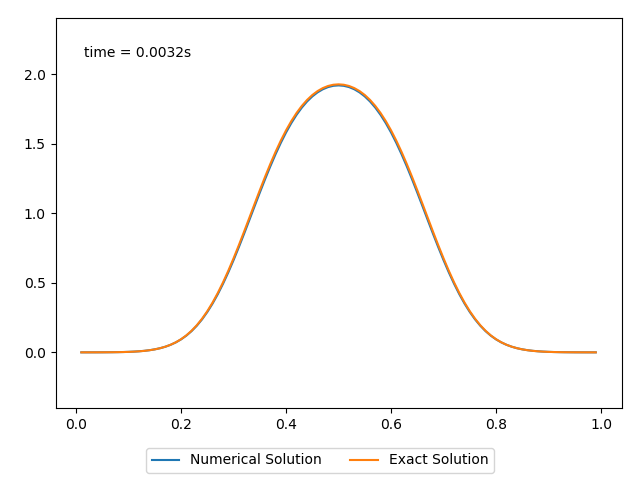

In [29]:
u, uExact, x, t=solveDiffusion(stolb2,a2, rk4, central_diff_second_der, nx = 100, nt = 100, L = 1, T = 0.006, KO = 1)
anim = animateDiffusion(u, uExact, x, t,name="rk4")

Число Куранта CFL 0.8


<IPython.core.display.Javascript object>


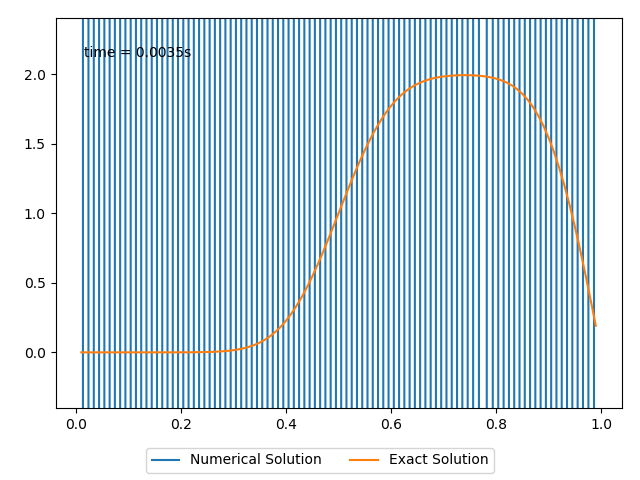

In [30]:
u, uExact, x, t=solveDiffusion(stolb1,a1, rk4, central_diff_second_der, nx = 100, nt = 100, L = 1, T = 0.008, KO = 1)
anim = animateDiffusion(u, uExact, x, t,name="rk4not")

## Теперь наш метод

### Первая функция

Число Куранта CFL 0.3333333333333333


<IPython.core.display.Javascript object>


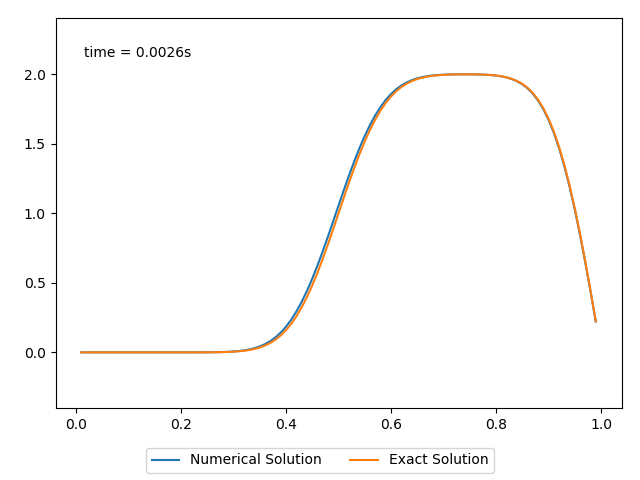

In [31]:
u, uExact, x, t=solveDiffusion(stolb1,a1, rk2_implicit, central_diff_second_der, nx = 100, nt = 300, L = 1, T = 0.01, KO = 1)
anim = animateDiffusion(u, uExact, x, t,name="rk2_implicit1")

### Вторая функция

In [ ]:
u, uExact, x, t=solveDiffusion(stolb2,a2, rk2_implicit, central_diff_second_der, nx = 100, nt = 300, L = 1, T = 0.01, KO = 1)
anim = animateDiffusion(u, uExact, x, t,name="rk2_implicit2")

Число Куранта CFL 0.3333333333333333


# Порядок сходимости по пространству

In [ ]:
def get_norm(u,uExact,dx): #Считаем L_1^h норму разности точного и численного решений
    numerical=u[-1]
    exact=uExact[-1]
    nx=len(numerical)
    dif=np.abs(numerical-exact)
    dif=np.square(dif)
    dif*=dx
    return np.sum(dif)

In [ ]:
def get_2norm(u,uExact):
    return np.linalg.norm(u-uExact)

In [ ]:
norms=[]
xes=[40,80,160]
L=1
for i in range(len(xes)):
    u,uExact,x,t=solveDiffusion(stolb1,a1, rk4, central_diff_second_der, nx = xes[i], nt = 40*(4**i), L = L, T = 0.01, KO = 1)
    print("kek")
    norms.append(get_norm(u,uExact,L/xes[i]))
#    norms.append(get_2norm(u,uExact))

In [ ]:
norms

In [ ]:
plt.close()
plt.plot(xes,norms)
plt.xlabel("Число точек в пространственной сетке")
plt.ylabel("Норма разности точного решения и численного")
plt.show()

In [ ]:
normslog=np.log(norms)
xeslog=np.log(xes)
print("Порядок сходимости по пространству = {}".format(np.polyfit(xeslog, normslog, 1)[0]))